In [27]:
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
import librosa
from matplotlib.patches import Rectangle
import pandas as pd

In [28]:
# Load audio file
audio_file = 'chopin.wav'
y, sr = librosa.load(audio_file)

Total number of notes detected: 1541


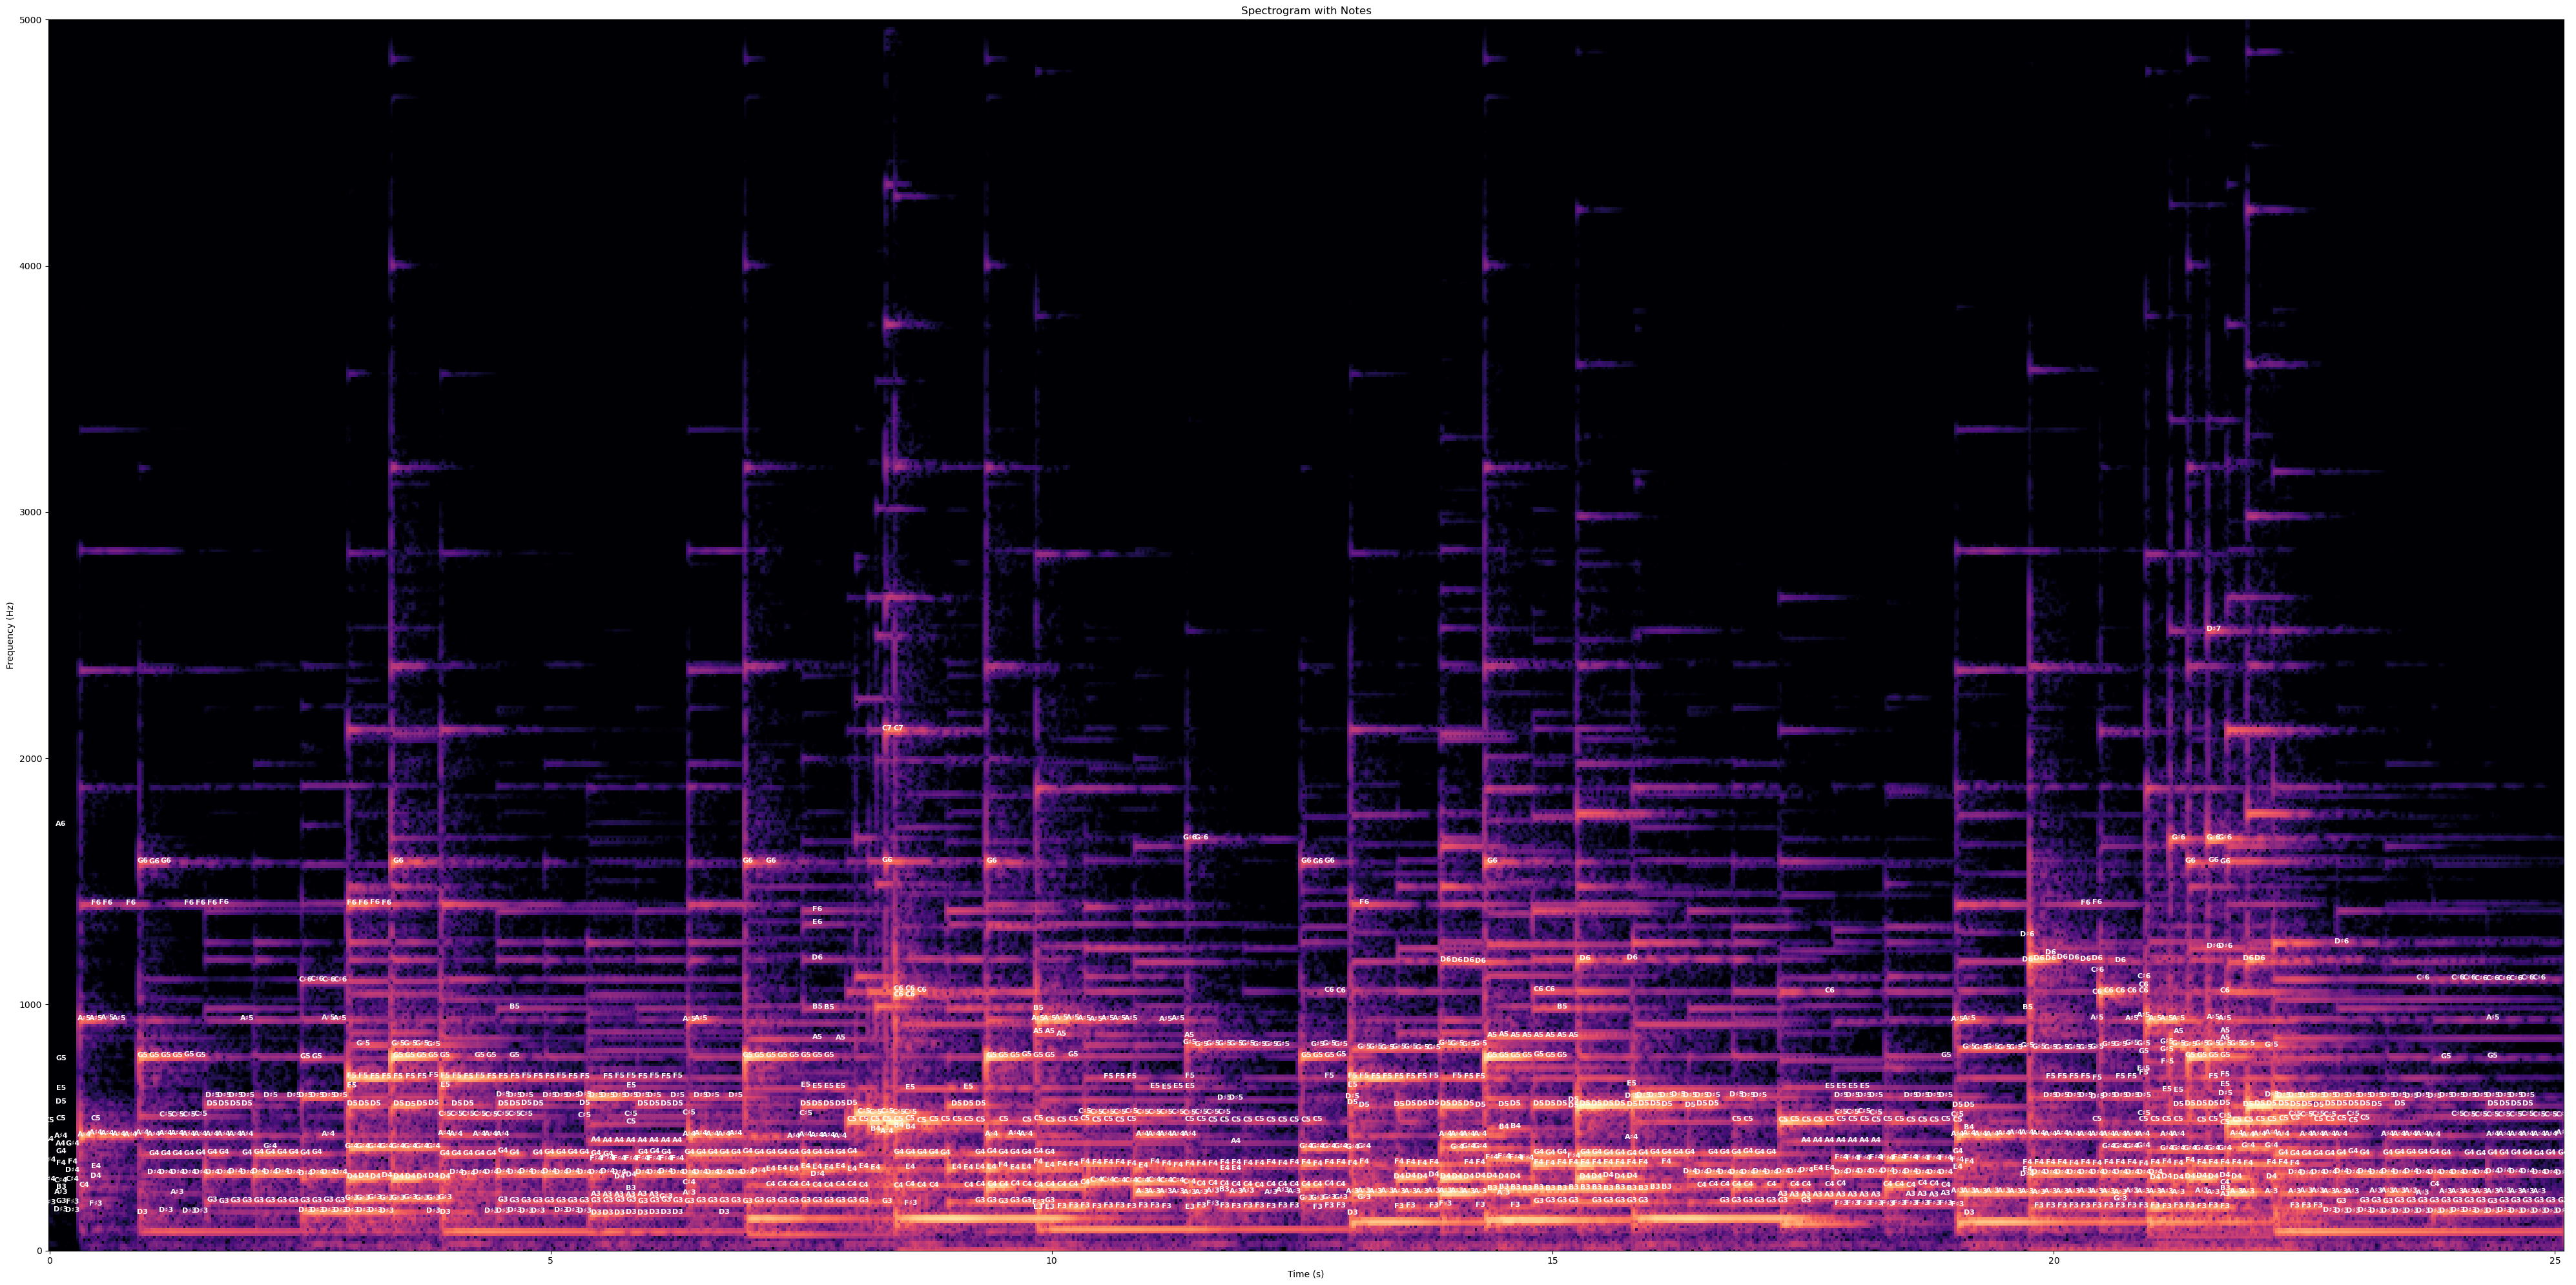

In [72]:
# Compute spectrogram
D = np.abs(librosa.stft(y))

# Convert magnitude spectrogram to dB scale
D_db = librosa.amplitude_to_db(D, ref=np.max)

# Compute pitches
pitches, magnitudes = librosa.piptrack(y=y, sr=sr)

# Convert pitches to notes
def freq_to_note(frequency):
    note_num = 12 * (np.log2(frequency) - np.log2(440)) + 69
    return int(round(note_num))  # MIDI note number

# Overlay notes on spectrogram
plt.figure(figsize=(40, 20))
librosa.display.specshow(D_db, sr=sr, x_axis='time', y_axis='hz')

total_notes_detected = 0  # Variable to store the total number of notes detected

for frame in range(0, pitches.shape[1], 5):  # Skip some frames to reduce clutter
    for freq, magnitude in zip(pitches[:, frame], magnitudes[:, frame]):
        if np.isfinite(freq) and freq > 0:  # Check if frequency is valid and positive
            if freq <= 5000:  # Cut off frequencies above 6000 Hz
                note = freq_to_note(freq)
                plt.text(frame * 512 / sr, min(freq, 5000), librosa.midi_to_note(note), ha='center', fontsize=8, color='white', fontweight='bold')
                total_notes_detected += 1  # Increment the count of detected notes

print("Total number of notes detected:", total_notes_detected)

# Set y-axis limit to 5000 Hz
plt.ylim(0, 5000)

# plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram with Notes')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()

Total number of notes detected: 1520


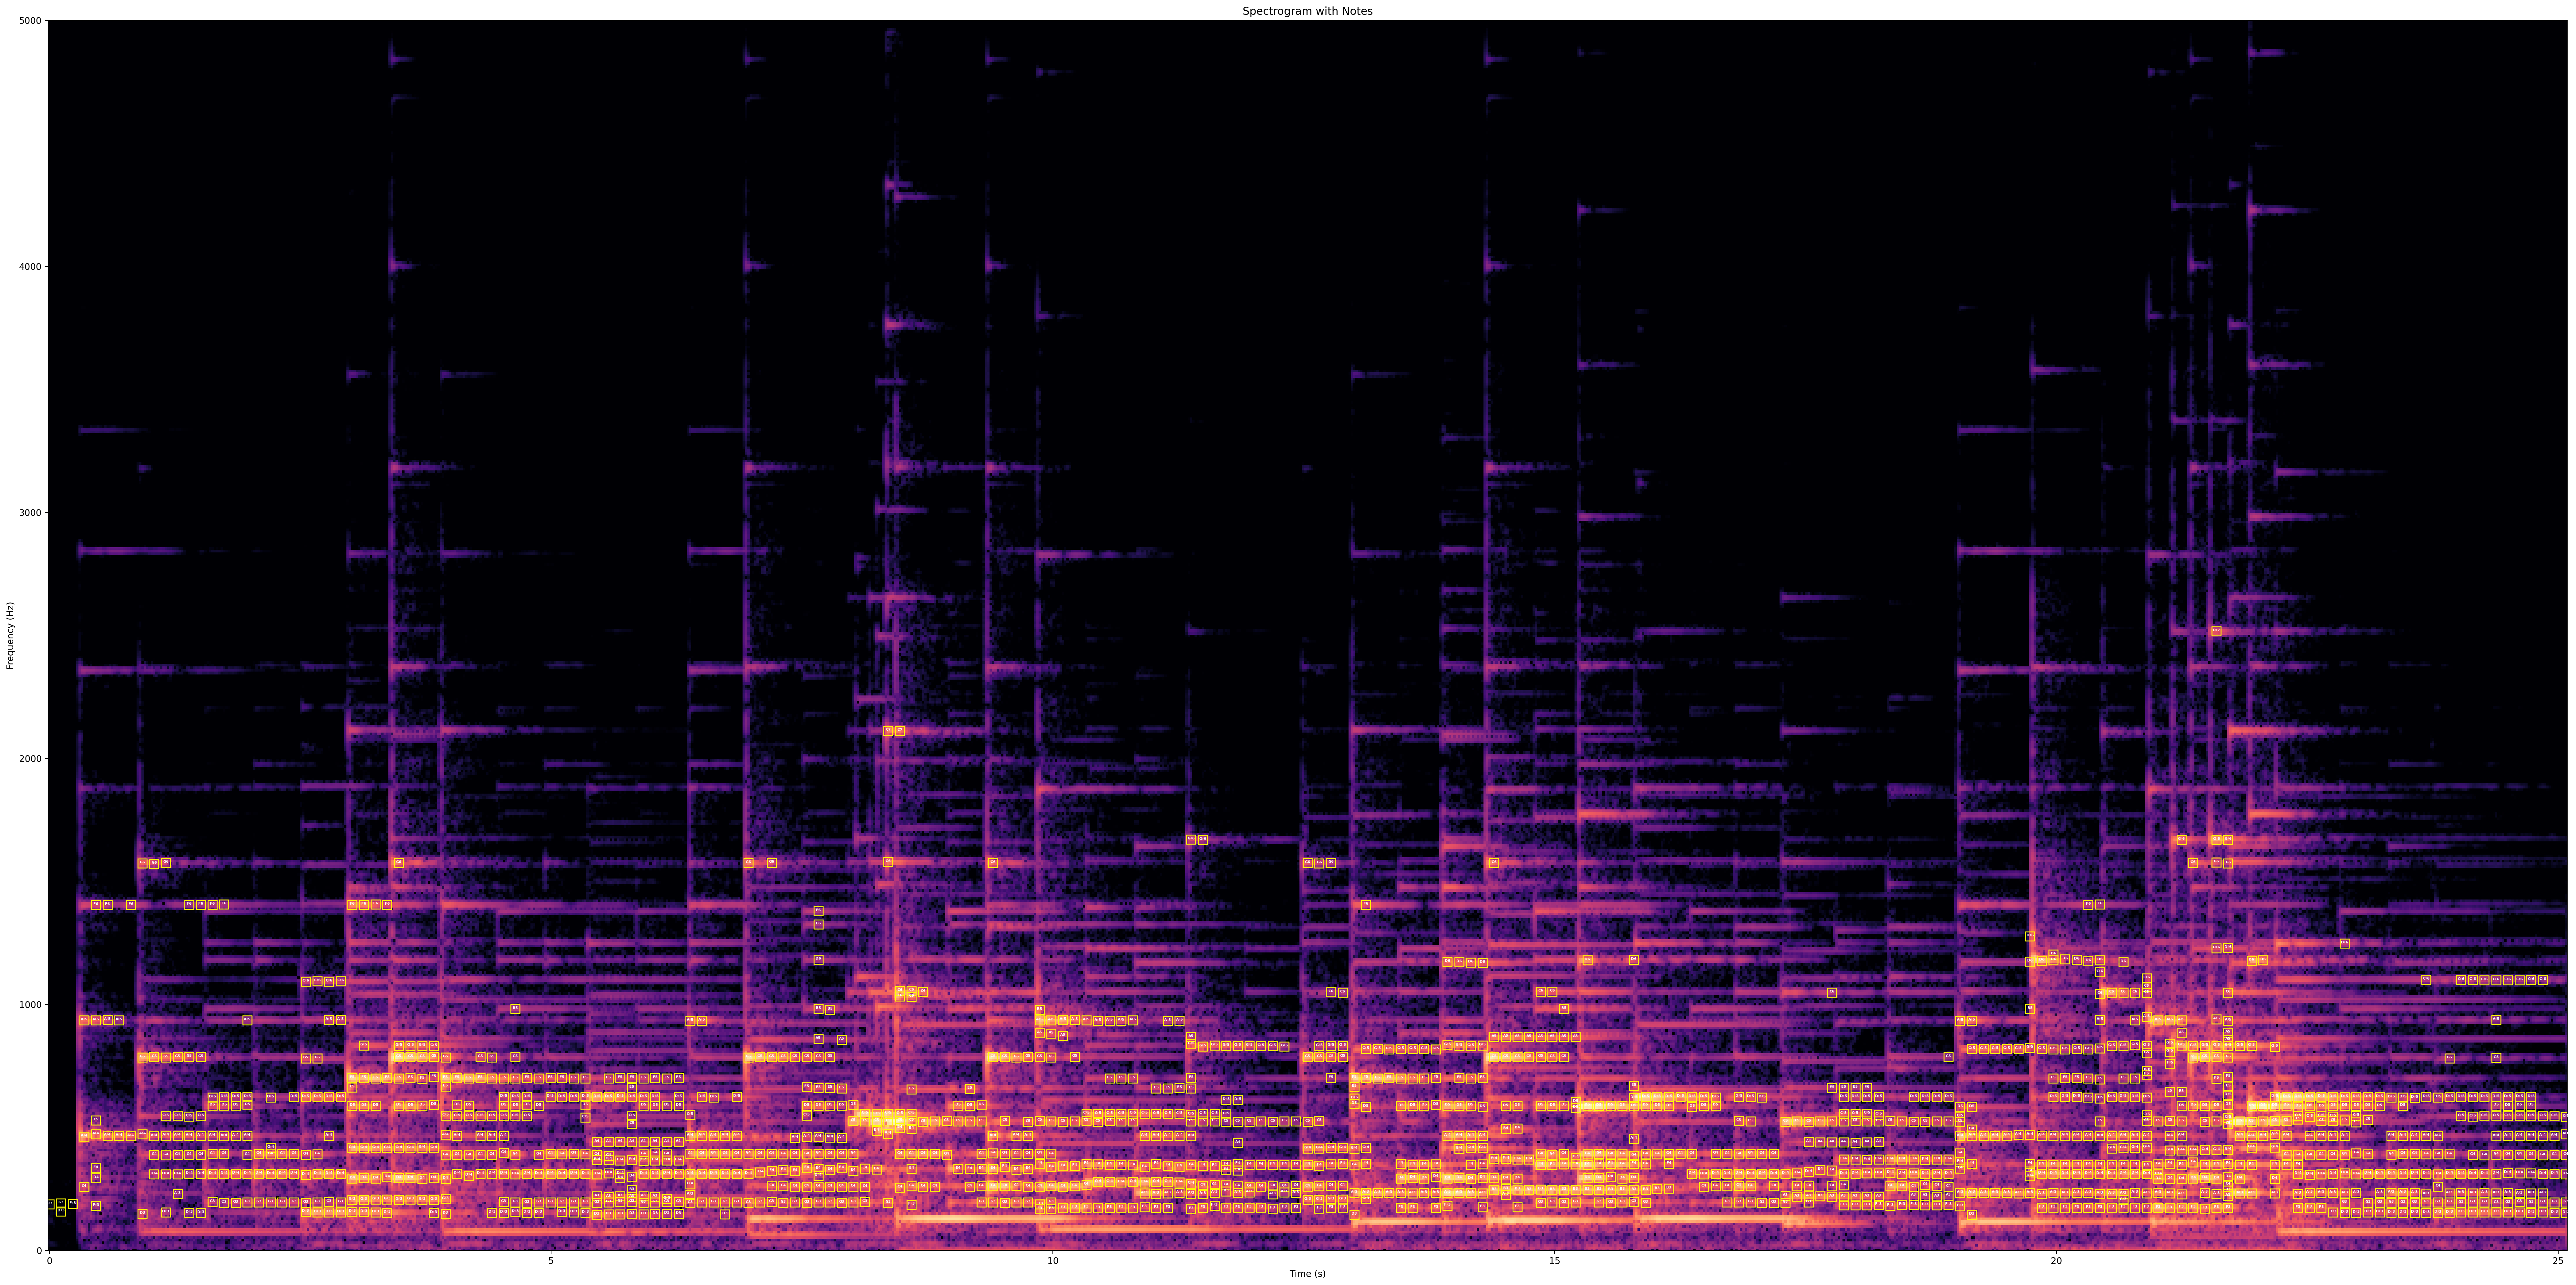

In [74]:
# Compute spectrogram
D = np.abs(librosa.stft(y))

# Convert magnitude spectrogram to dB scale
D_db = librosa.amplitude_to_db(D, ref=np.max)

# Compute pitches
pitches, magnitudes = librosa.piptrack(y=y, sr=sr)

# Convert pitches to notes
def freq_to_note(frequency):
    note_num = 12 * (np.log2(frequency) - np.log2(440)) + 69
    return int(round(note_num))  # MIDI note number

# Define your threshold value
threshold = 0.01  # Adjust this value as needed

plt.figure(figsize=(40, 20), dpi=200)
librosa.display.specshow(D_db, sr=sr, x_axis='time', y_axis='hz')

total_notes_detected = 0  # Variable to store the total number of notes detected

for frame in range(0, pitches.shape[1], 5):
    for freq, magnitude in zip(pitches[:, frame], magnitudes[:, frame]):
        if np.isfinite(freq) and freq > 0 and magnitude > threshold:
            if freq <= 5000:
                note = freq_to_note(freq)
                plt.text(frame * 512 / sr, min(freq, 5000), librosa.midi_to_note(note), ha='center', fontsize=4, color='white', fontweight='bold')
                total_notes_detected += 1  # Increment the count of detected notes
                
                # Add blue border square around the note
                plt.plot(frame * 512 / sr, min(freq, 5000), 's', markersize=10, markerfacecolor='none', markeredgecolor='yellow', markeredgewidth=1)

print("Total number of notes detected:", total_notes_detected)

plt.ylim(0, 5000)
plt.title('Spectrogram with Notes')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()